In [220]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn

In [205]:
def test_iterative_imputer(f):
    imputer = IterativeImputer(random_state=0)
    
    x = np.linspace(-20, 20, 100)
    y = f(x)
    missing_y = np.where(x < 0, f(x), np.nan)
    
    x, y, missing_y = imputer.fit_transform(np.column_stack((x, y, missing_y))).T

    plt.figure(figsize = (10, 5))
    plt.plot(x, y)
    plt.plot(x, missing_y)

## Test imputation with linear correlation

Great! The real e imputed series are overlapped!

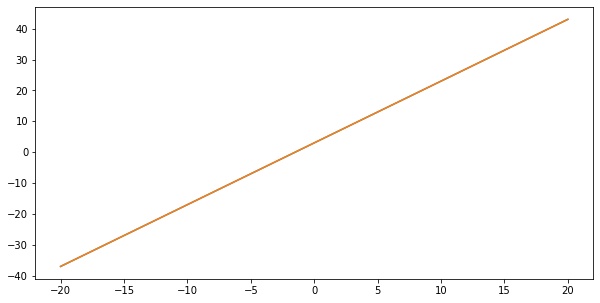

In [192]:
test_iterative_imputer(lambda x: 2 * x + 3)

## Test with non linear correlation

Great! The real and imputed series are overlapped!

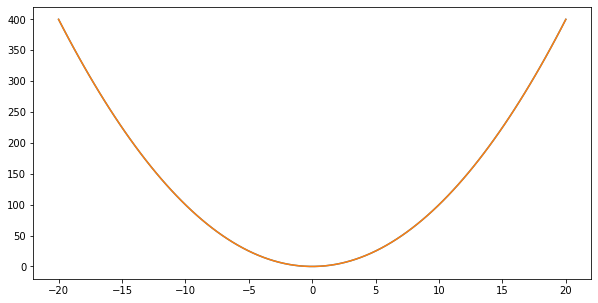

In [193]:
test_iterative_imputer(lambda x: x**2)

## Test with random error

In linear function case, the estimated values approximates the function very well and cancels the effect of the error

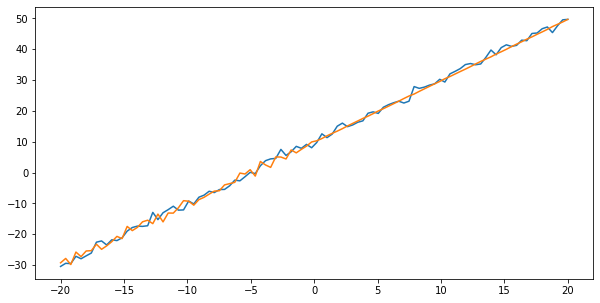

In [194]:
def linear_f_with_error(x):
    return 2 * x + np.random.normal(10, 1, len(x))

test_iterative_imputer(linear_f_with_error)

In non linear function case, it impress how it manages to follow the error

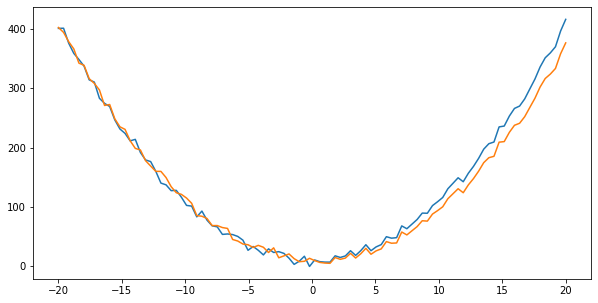

In [204]:
def non_linear_f_with_error(x):
    return x ** 2 + np.random.normal(10, 5, len(x))

test_iterative_imputer(non_linear_f_with_error)

## Test with string

In [228]:
df = (
    pd
      .DataFrame(data={'x': [1] * 10, 'y': [2] * 10})
      .assign(missing_y=lambda df: np.where(df.index < 5, df['y'], None))
)

imputer = IterativeImputer(random_state=0)
imputer.fit(df)
pd.DataFrame(data=imputer.transform(df), columns=imputer.feature_names_in_)

,x,y,missing_y
0,1.0,2.0,2.0
1,1.0,2.0,2.0
2,1.0,2.0,2.0
3,1.0,2.0,2.0
4,1.0,2.0,2.0
5,1.0,2.0,2.0
6,1.0,2.0,2.0
7,1.0,2.0,2.0
8,1.0,2.0,2.0
9,1.0,2.0,2.0
